In [202]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [203]:
col_names=['PassengerId',
           'Survived',
           'Pclass',
           'Name',
           'Sex',
           'Age', 
           'SibSp',
           'Parch',
           'Ticket',
           'Fare',
           'Cabin',
           'Embarked']

In [204]:
#ds=pd.read_csv('train.csv', ',', names=col_names, index_col=False)
ds = pd.read_csv('train.csv')
test_ds = pd.read_csv('test.csv')
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [205]:
ds.shape

(891, 12)

In [206]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [207]:
ds['Sex'].replace(['female','male'], [0,1], inplace = True)
test_ds['Sex'].replace(['female','male'], [0,1], inplace = True)

In [208]:
drop_names = ['PassengerId',
              'Name',
              'Ticket',
              'Fare',
              'Embarked',
              'Cabin']
drop_names_test = ['Name',
                   'Ticket',
                   'Fare',
                   'Embarked',
                   'Cabin']

In [209]:
ds.fillna(ds.mean(), inplace = True)
test_ds.fillna(test_ds.mean(), inplace = True)

In [210]:
ds = ds.drop(columns = drop_names)
test_ds = test_ds.drop(columns = drop_names_test)
test_ds.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,1,34.5,0,0
1,893,3,0,47.0,1,0
2,894,2,1,62.0,0,0
3,895,3,1,27.0,0,0
4,896,3,0,22.0,1,1


In [211]:
ds.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000


In [212]:
test_ds.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,30.272590,0.447368,0.392344
std,120.810458,0.841838,0.481622,12.634534,0.896760,0.981429
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000
50%,1100.500000,3.000000,1.000000,30.272590,0.000000,0.000000
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000


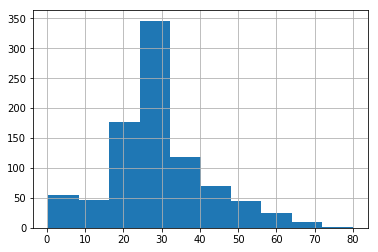

In [213]:
ds.Age.hist()

In [214]:
ds.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000


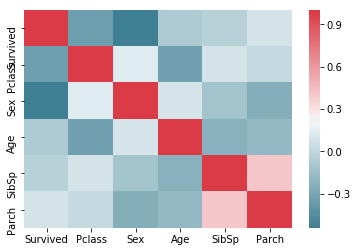

In [215]:
import seaborn as sns
corr=ds.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [216]:
ds[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [217]:
ds[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.000000
9,5.00,1.000000
80,63.00,1.000000
69,53.00,1.000000
1,0.67,1.000000
17,13.00,1.000000
16,12.00,1.000000
88,80.00,1.000000
2,0.75,1.000000
3,0.83,1.000000


In [218]:
ds[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,0,0.742038
1,1,0.188908


In [219]:
ds[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [220]:
ds[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


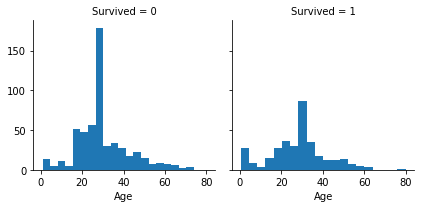

In [221]:
g = sns.FacetGrid(ds, col='Survived')
g.map(plt.hist, 'Age', bins=20)

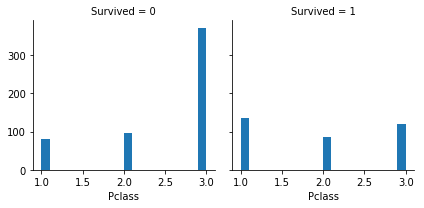

In [222]:
g = sns.FacetGrid(ds, col='Survived')
g.map(plt.hist, 'Pclass', bins=20)

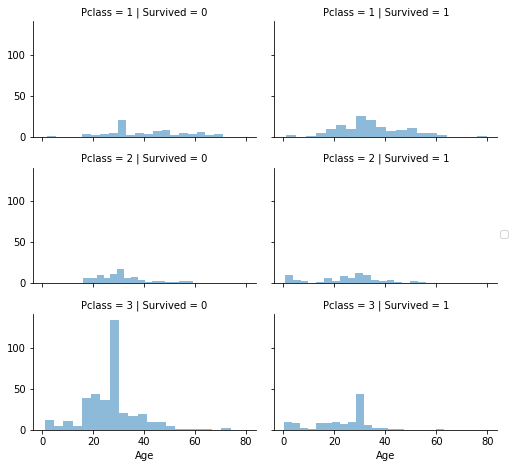

In [223]:
grid = sns.FacetGrid(ds, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [224]:
ds['AgeGroup'] = pd.cut(ds['Age'], 5)
ds[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean().sort_values(by='AgeGroup', ascending=True)

,AgeGroup,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [225]:
ds.info()
X_train = ds.drop("Survived", axis=1)
Y_train = ds["Survived"]
X_test = test_ds.drop(columns = 'PassengerId')
#X_test  = ds.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
AgeGroup    891 non-null category
dtypes: category(1), float64(1), int64(5)
memory usage: 42.8 KB


((891, 6), (891,), (418, 5))

In [226]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,1,34.5,0,0
1,3,0,47.0,1,0
2,2,1,62.0,0,0
3,3,1,27.0,0,0
4,3,0,22.0,1,1


In [227]:
X_test.tail()

,Pclass,Sex,Age,SibSp,Parch
413,3,1,30.27259,0,0
414,1,0,39.00000,0,0
415,3,1,38.50000,0,0
416,3,1,30.27259,0,0
417,3,1,30.27259,1,1


In [228]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

In [230]:
pd.DataFrame({
        "PassengerId": test_ds["PassengerId"],
        "Survived": Y_pred
    }).to_csv('submission.csv', index=False)